# [코로나 전후 항공사별 항공수요 분석](https://www.youtube.com/watch?v=bCCWwmaSJ0E&list=PLaTc2c6yEwmqrXsGvpB3vK_nAzPEzr-ib&index=2)

## [국가통계포털](https://www.kosis.kr/index/index.do)

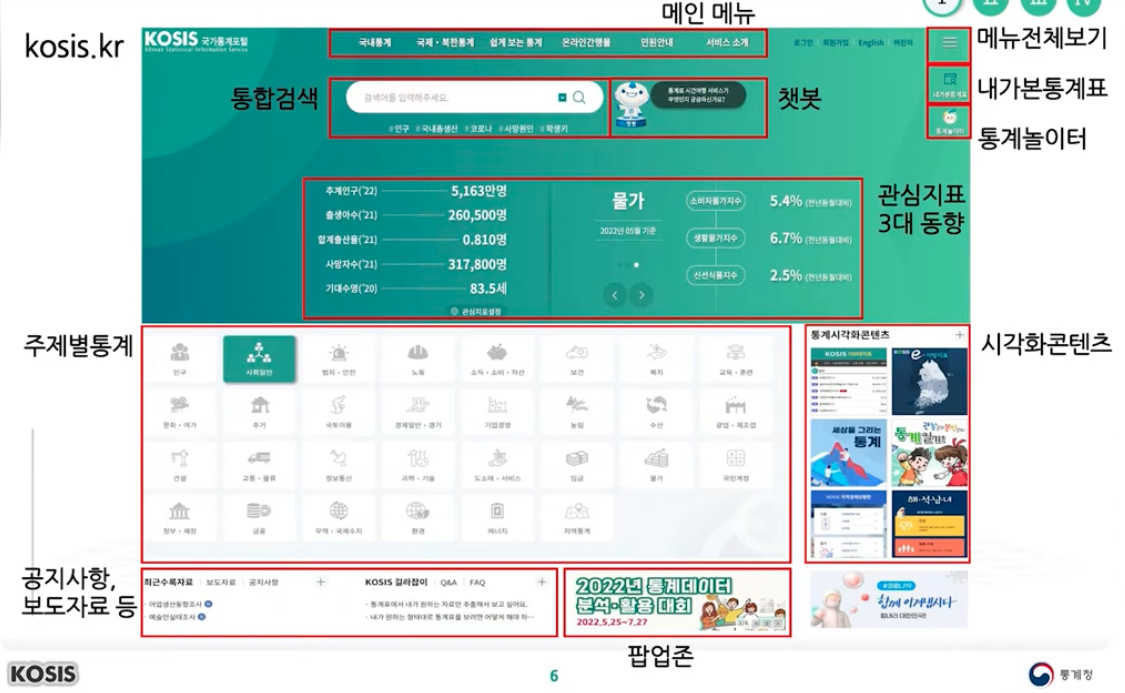

## [항공사별 통계 다운로드](https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2)

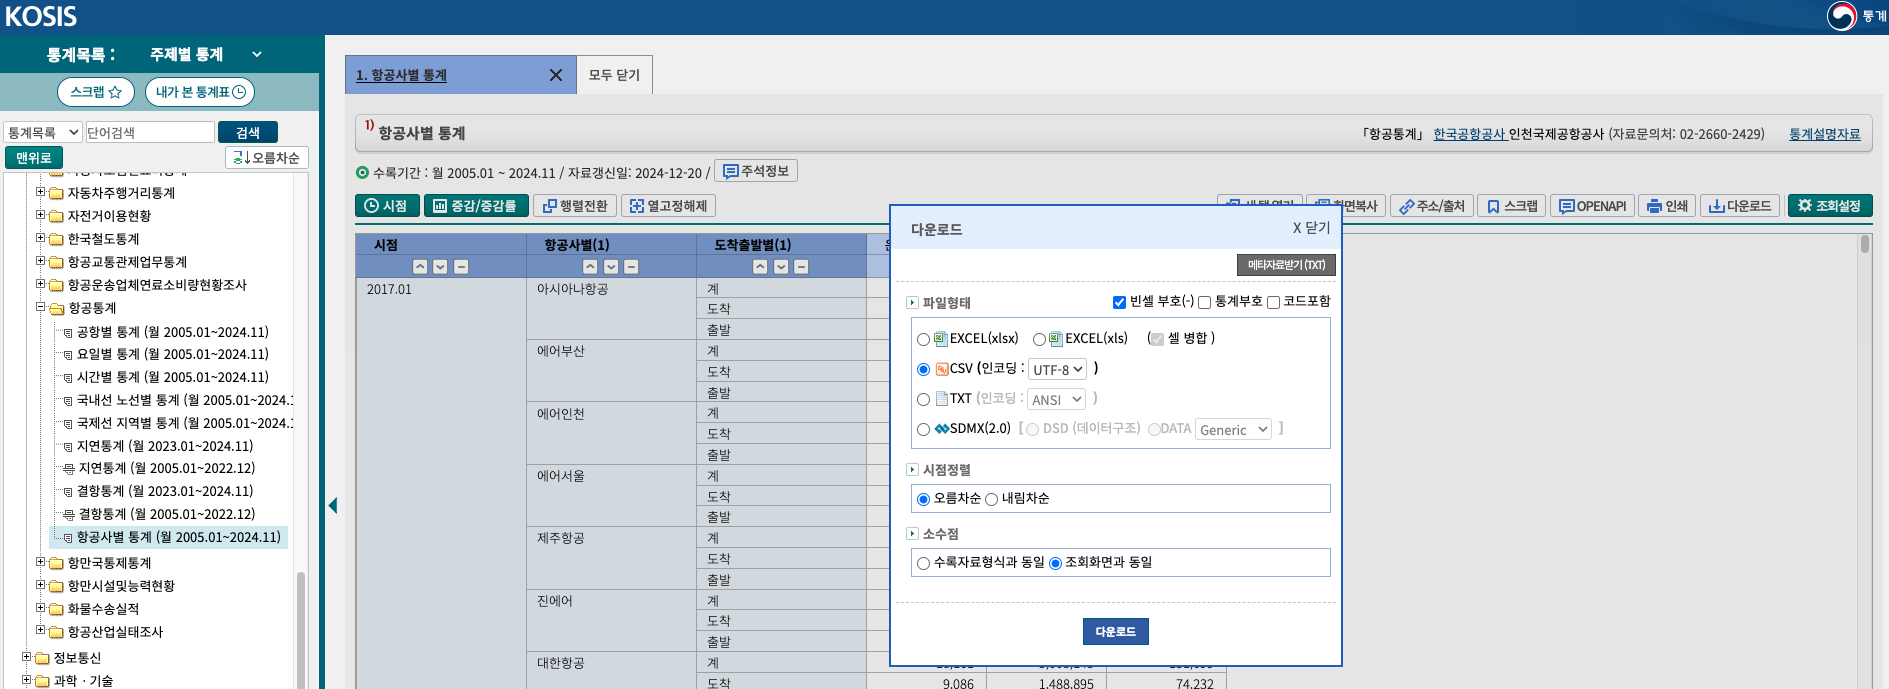

In [31]:
import pandas as pd
from glob import glob

file_names = glob("data/*.csv")
file_names

['data/kosis-airline-company.csv']

In [32]:
df_comp = pd.read_csv(file_names[0])
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        3132 non-null   float64
 1   항공사별(1)   3132 non-null   object 
 2   도착출발별(1)  3132 non-null   object 
 3   운항 (편)    3132 non-null   int64  
 4   여객 (명)    3132 non-null   int64  
 5   화물 (톤)    3132 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 146.9+ KB


In [33]:
df_comp = pd.read_csv(file_names[0], dtype={"시점": "object"})
df_comp.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2017.01,아시아나항공,계,12278,2150562,83765
1,2017.01,아시아나항공,도착,6141,1071932,41237
2,2017.01,아시아나항공,출발,6137,1078630,42528
3,2017.01,에어부산,계,5551,917653,10293
4,2017.01,에어부산,도착,2777,458649,6799


In [34]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        3132 non-null   object
 1   항공사별(1)   3132 non-null   object
 2   도착출발별(1)  3132 non-null   object
 3   운항 (편)    3132 non-null   int64 
 4   여객 (명)    3132 non-null   int64 
 5   화물 (톤)    3132 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 146.9+ KB


In [35]:
!pip install koreanize-matplotlib

## 데이터 분석

In [36]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [38]:
df_com_sum = df_comp[df_comp['도착출발별(1)'] == '계']
df_com_arrive = df_comp[df_comp['도착출발별(1)'] == '도착']
df_com_depart = df_comp[df_comp['도착출발별(1)'] == '출발']

df_com_sum.shape, df_com_arrive.shape, df_com_depart.shape

((1044, 6), (1044, 6), (1044, 6))

### 항공사별로 연간 평균 여객 수 계산

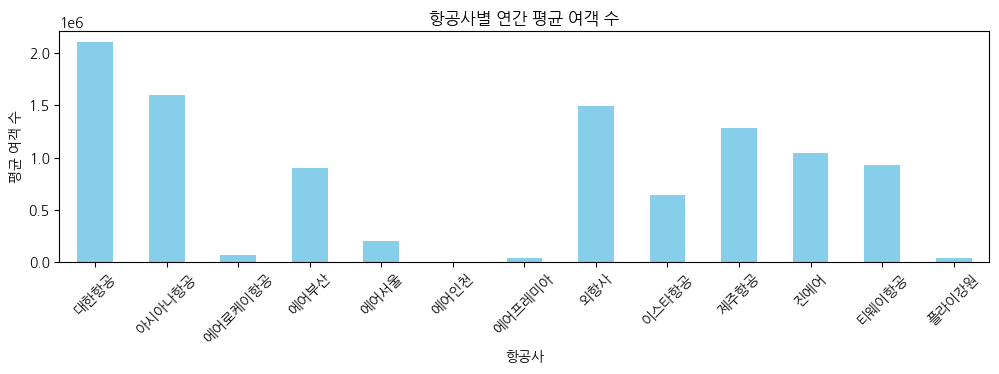

In [39]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_com_sum.groupby("항공사별(1)")["여객 (명)"].mean()

# 그래프로 표시
plt.figure(figsize=(12, 3))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()

### 연간 운항 및 여객 증가율 계산:
- 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교합니다.

<ipython-input-44-1896f186f14c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_sum["운항 (편)_증가율"] = df_com_sum.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100
<ipython-input-44-1896f186f14c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_sum["여객 (명)_증가율"] = df_com_sum.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100


,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
0,2017.01,아시아나항공,계,12278,2150562,83765,NaN,NaN
3,2017.01,에어부산,계,5551,917653,10293,NaN,NaN
6,2017.01,에어인천,계,86,0,597,NaN,NaN
9,2017.01,에어서울,계,415,61421,604,NaN,NaN
12,2017.01,제주항공,계,6662,1169280,8535,NaN,NaN


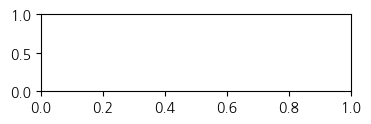

In [44]:
# 연간 운항 편수 증가율 계산
df_com_sum["운항 (편)_증가율"] = df_com_sum.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

# 연간 여객 수 증가율 계산
df_com_sum["여객 (명)_증가율"] = df_com_sum.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100
df_com_sum.head()

In [45]:
df_com_sum.tail()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
3117,2024.11,티웨이항공,계,6692,1228161,10359,-3.238866,1.158225
3120,2024.11,이스타항공,계,3515,613644,3429,-6.887417,-4.351716
3123,2024.11,에어로케이항공,계,704,114342,787,-22.891566,-21.709837
3126,2024.11,에어프레미아,계,229,58199,3143,-5.371901,-10.272579
3129,2024.11,외항사,계,14380,2247274,118616,-7.536008,-7.110608


### 도착/출발별로 연간 운항 및 여객 분석:
- 도착과 출발별로 연간 운항 편수 및 여객 수를 분석합니다

In [46]:
# 도착별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_com_arrive.groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

arrival_stats.head()

,운항 (편),여객 (명)
시점,,
2017.01,35679,6020504
2017.02,32213,5629399
2017.03,35118,5606531
2017.04,34226,5777657
2017.05,35760,5969435


In [48]:
# 출발별 연간 운항 편수 및 여객 수 분석
departure_stats = df_com_depart.groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

departure_stats.head()

,운항 (편),여객 (명)
시점,,
2017.01,35652,6098020
2017.02,32219,5603581
2017.03,35122,5471766
2017.04,34244,5917312
2017.05,35751,5841676


<Axes: xlabel='시점'>

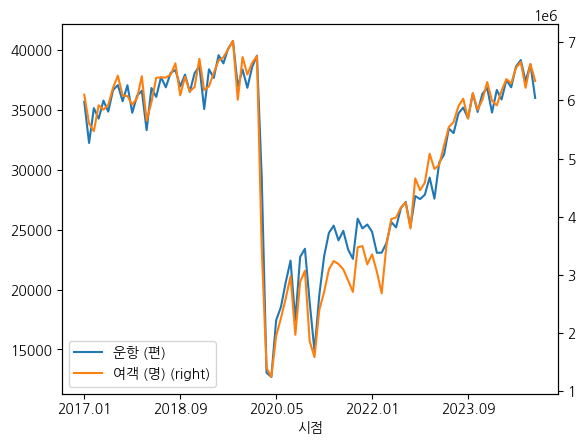

In [52]:
departure_stats.plot(secondary_y="여객 (명)")

### 시간에 따른 화물 운송량 시각화:
- 시간에 따른 화물 운송량의 추이를 시각화합니다.

In [53]:
df_com_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 3129
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          1044 non-null   object 
 1   항공사별(1)     1044 non-null   object 
 2   도착출발별(1)    1044 non-null   object 
 3   운항 (편)      1044 non-null   int64  
 4   여객 (명)      1044 non-null   int64  
 5   화물 (톤)      1044 non-null   int64  
 6   운항 (편)_증가율  1031 non-null   float64
 7   여객 (명)_증가율  936 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 105.7+ KB


In [54]:
df_com_sum.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
0,2017.01,아시아나항공,계,12278,2150562,83765,NaN,NaN
3,2017.01,에어부산,계,5551,917653,10293,NaN,NaN
6,2017.01,에어인천,계,86,0,597,NaN,NaN
9,2017.01,에어서울,계,415,61421,604,NaN,NaN
12,2017.01,제주항공,계,6662,1169280,8535,NaN,NaN


In [55]:
# 시간에 따른 화물 운송량 시각화
df_com_sum["시점"] = pd.to_datetime(df_com_sum["시점"])  # 날짜 형식으로 변환
df_com_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 3129
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시점          1044 non-null   datetime64[ns]
 1   항공사별(1)     1044 non-null   object        
 2   도착출발별(1)    1044 non-null   object        
 3   운항 (편)      1044 non-null   int64         
 4   여객 (명)      1044 non-null   int64         
 5   화물 (톤)      1044 non-null   int64         
 6   운항 (편)_증가율  1031 non-null   float64       
 7   여객 (명)_증가율  936 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 105.7+ KB


<ipython-input-55-e375c29b31fc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_com_sum["시점"] = pd.to_datetime(df_com_sum["시점"])  # 날짜 형식으로 변환
<ipython-input-55-e375c29b31fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_sum["시점"] = pd.to_datetime(df_com_sum["시점"])  # 날짜 형식으로 변환


In [56]:
df_com_sum["년"] = df_com_sum["시점"].dt.year
df_com_sum["월"] = df_com_sum["시점"].dt.month
# df_com_sum["일"] = df_com_sum["시점"].dt.day
# df_com_sum["요일"] = df_com_sum["시점"].dt.dayofweek # (월 = 0)

<ipython-input-56-2dac24ecc6ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_sum["년"] = df_com_sum["시점"].dt.year
<ipython-input-56-2dac24ecc6ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_sum["월"] = df_com_sum["시점"].dt.month


In [58]:
df_com_sum.tail()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율,년,월
3117,2024-11-01,티웨이항공,계,6692,1228161,10359,-3.238866,1.158225,2024,11
3120,2024-11-01,이스타항공,계,3515,613644,3429,-6.887417,-4.351716,2024,11
3123,2024-11-01,에어로케이항공,계,704,114342,787,-22.891566,-21.709837,2024,11
3126,2024-11-01,에어프레미아,계,229,58199,3143,-5.371901,-10.272579,2024,11
3129,2024-11-01,외항사,계,14380,2247274,118616,-7.536008,-7.110608,2024,11


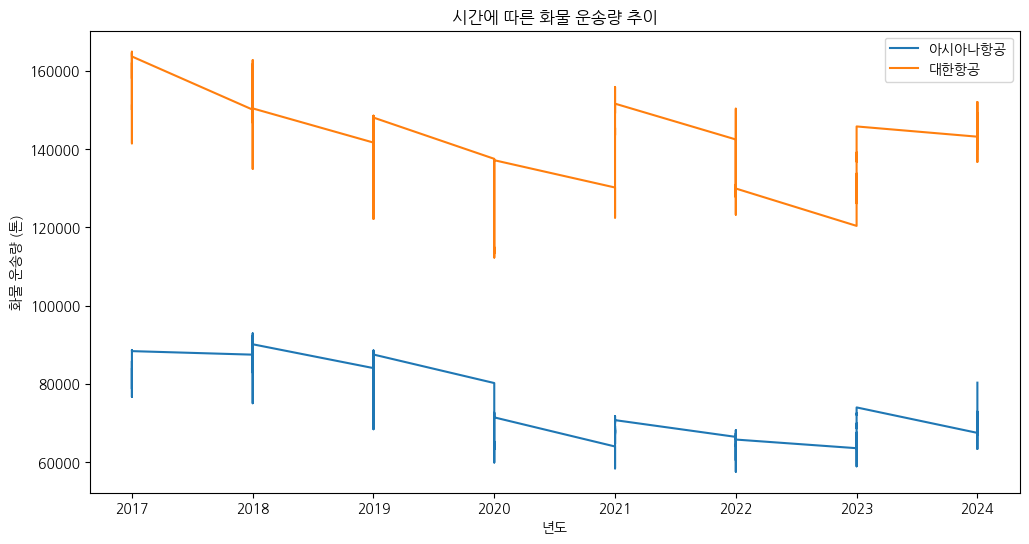

In [59]:
plt.figure(figsize=(12, 6)) # 도화지 크기 (12, 6)

plt.plot( # 선형 그래프
    # df_com_sum -> 모든 항공 데이터
    # df_com_sum[df_com_sum["항공사별(1)"] == "아시아나항공"] -> 아시아나항공 데이터
    # df_com_sum[df_com_sum["항공사별(1)"] == "아시아나항공"]["년"] -> 아시아나항공의 년도 데이터
    df_com_sum[df_com_sum["항공사별(1)"] == "아시아나항공"]["년"] # x 축 데이터
    , df_com_sum[df_com_sum["항공사별(1)"] == "아시아나항공"]["화물 (톤)"] # y 축 데이터
    , label="아시아나항공") # 선형 그래프명

plt.plot(
    df_com_sum[df_com_sum["항공사별(1)"] == "대한항공"]["년"]
    , df_com_sum[df_com_sum["항공사별(1)"] == "대한항공"]["화물 (톤)"]
    , label="대한항공")


plt.xlabel("년도")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

In [60]:
df_com_sum["항공사별(1)"].unique()

array(['아시아나항공', '에어부산', '에어인천', '에어서울', '제주항공', '진에어', '대한항공', '티웨이항공',
       '이스타항공', '외항사', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

In [62]:
year_comp = pd.crosstab(index=df_com_sum["년"],
            columns=df_com_sum["항공사별(1)"],
            values=df_com_sum["여객 (명)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None).format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"35,287,835","25,605,946",0,"11,363,466","826,908",0,0,"24,513,986","8,633,452","15,318,441","12,511,792","9,269,280",0
2018,"34,293,250","26,235,035",0,"12,669,496","1,728,032",0,0,"27,217,444","9,023,563","16,813,548","12,516,682","10,020,367",0
2019,"35,495,253","26,749,766",0,"12,253,343","2,008,071",0,0,"30,041,872","9,360,221","18,277,271","12,376,909","11,065,496","45,242"
2020,"11,759,020","10,999,742",0,"7,187,743","2,111,200",0,0,"4,719,167","1,555,938","9,843,178","7,972,047","8,578,024","301,004"
2021,"10,748,954","9,673,464","272,786","9,009,003","3,378,124",0,"163,554","1,374,760",0,"13,056,191","11,731,561","10,321,021","273,708"
2022,"17,638,503","13,457,338","737,614","10,668,189","3,455,976",0,"98,788","7,022,749",0,"14,533,268","13,168,783","11,344,017","714,657"
2023,"26,549,034","19,162,423","970,543","11,406,451","3,015,076",0,"674,547","21,209,913","3,754,624","17,368,133","14,728,863","14,491,778","256,654"
2024,"27,894,984","19,505,447","1,393,396","10,809,279","2,508,461",0,"705,035","25,430,552","6,544,489","16,772,586","14,354,828","13,173,346",0


<Axes: title={'center': '저가항공 연도별 여객 수'}, xlabel='년'>

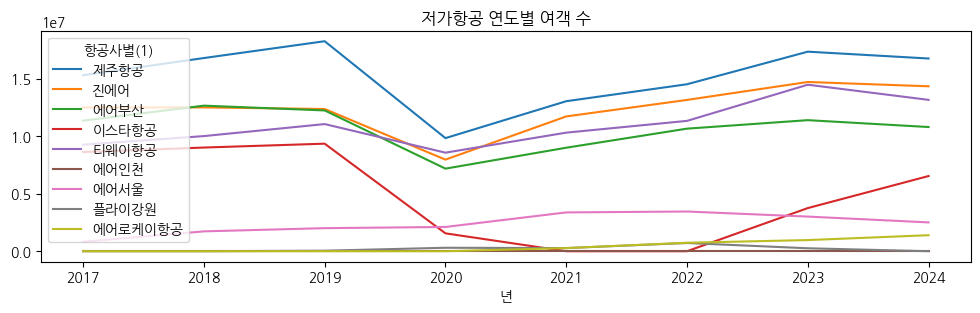

In [63]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(
           figsize=(12, 3), title="저가항공 연도별 여객 수")


In [65]:
year_comp = pd.crosstab(index=df_com_sum["년"],
            columns=df_com_sum["항공사별(1)"],
            values=df_com_sum["운항 (편)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"216,078","144,611",0,"69,098","5,837",942,0,"156,448","52,594","86,379","64,084","54,143",0
2018,"215,871","140,680",0,"76,649","10,171","1,537",0,"166,833","52,216","96,533","66,635","58,830",0
2019,"213,665","139,456",0,"76,887","11,572","1,268",0,"181,481","54,851","107,661","65,029","66,711",360
2020,"112,677","85,125",0,"50,208","11,991","1,381",0,"64,229","10,122","63,560","53,580","56,083","3,024"
2021,"115,097","80,680","2,834","57,286","17,922","2,384",657,"58,625",0,"78,587","77,488","62,672","2,598"
2022,"131,688","89,486","4,264","60,409","17,574","3,337",680,"73,244",0,"85,160","81,461","63,088","5,261"
2023,"162,366","110,303","6,150","64,100","15,381","3,556","2,432","141,268","21,104","101,703","82,949","80,312","1,803"
2024,"169,634","104,449","9,046","59,202","12,938","3,111","2,540","164,077","37,730","99,210","80,798","73,525",0


<Axes: title={'center': '저가항공 연도별 운항 수'}, xlabel='년'>

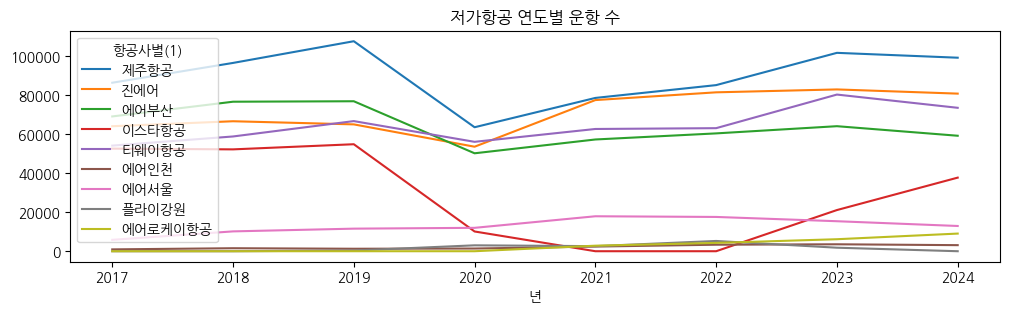

In [66]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(
           figsize=(12, 3), title="저가항공 연도별 운항 수")


In [67]:
year_comp = pd.crosstab(index=df_com_sum["년"],
            columns=df_com_sum["항공사별(1)"],
            values=df_com_sum["화물 (톤)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None, cmap="Oranges").format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"1,879,326","1,003,181",0,"89,047","8,260","6,676",0,"1,289,794","50,148","104,760","121,992","58,585",0
2018,"1,825,571","1,047,604",0,"84,674","15,693","18,246",0,"1,372,050","56,745","114,660","115,310","64,636",0
2019,"1,694,441","984,940",0,"73,802","16,818","17,760",0,"1,389,423","55,961","120,458","107,022","72,576",236
2020,"1,503,995","815,432",0,"38,962","9,351","12,346",0,"906,393","8,605","47,411","49,170","41,175","1,721"
2021,"1,737,215","808,795","1,535","41,967","10,345","26,175",663,"1,050,414",0,"51,387","54,886","44,463","1,574"
2022,"1,615,928","773,131","4,412","54,453","13,802","37,783","8,341","1,054,427",0,"78,369","72,248","62,330","3,923"
2023,"1,607,665","810,295","5,858","73,898","20,045","39,322","30,227","1,198,037","16,904","142,723","110,755","108,685","1,935"
2024,"1,595,395","781,481","9,027","73,343","18,847","36,401","34,110","1,238,678","35,499","144,375","116,081","108,408",0


<Axes: title={'center': '저가항공 연도별 화물(톤) 수'}, xlabel='년'>

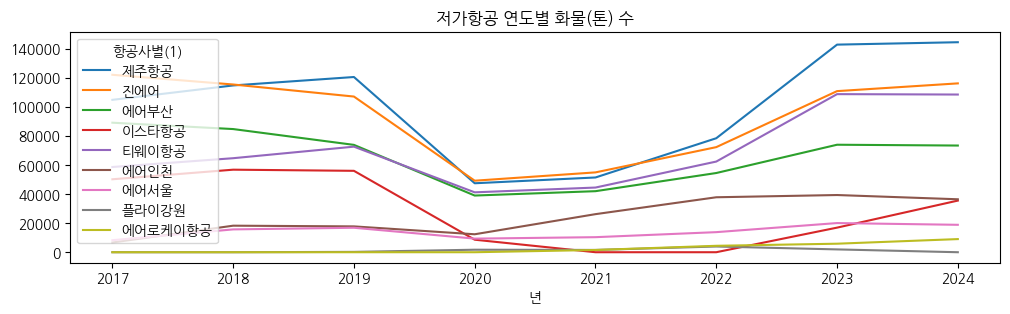

In [68]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(
           figsize=(12, 3), title="저가항공 연도별 화물(톤) 수")
